In [ ]:
# To upload our datasets from our working directory we need to mount our drive contents to the colab environment. 
# For the code to do so you can search “mount” in code snippets or use the code given below. 
# Our entire drive contents are now mounted on colab at the location “/gdrive”.

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)#displaying long list of columns
pd.set_option('display.max_rows', None)#displaying long list of rows
pd.set_option('display.width', 1000)#width of window

from sklearn.metrics import accuracy_score #works
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from collections import Counter #for Smote,
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn import linear_model
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from subprocess import check_output


trainfile = r'/gdrive/My Drive/CIS 508/Group Assignment/train.csv'
trainData = pd.read_csv(trainfile)  #creates a dataframe
testfile = r'/gdrive/My Drive/CIS 508/Group Assignment/test.csv'
testData = pd.read_csv(testfile)  #creates a dataframe
print(trainData.shape)
print(testData.shape)




Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


(1460, 81)
(1459, 80)


In [ ]:
#Extract Target Column before doing missing value substitutions and one-hot encoding======
Target_Train_Cols = trainData["SalePrice"] #make copy of target column
trainData = trainData.drop(["SalePrice"], axis=1) #extracting training data without the target column

print(trainData.shape)

(1460, 77)


In [ ]:
#DROP COLUMNS WITH LOTS OF MISSING VALUES===============================
#CAN ALSO DROP ROWS WITH LOTS OF MISSING VALUES
#Combine Train data and test data first so that the SAME COLUMNS are DROPPED in each
combined_Data = pd.concat([trainData, testData], keys=[0,1])

combined_Data.isnull()
print(combined_Data.isnull().shape)

(2919, 76)


In [ ]:
#Define threshold for dropping columns
percent=int(0.6*(combined_Data.shape[0]))#drop if >40% missing data each column 
print(percent)
#Drop columns that have less than "thresh" number of non_Nans
td1=combined_Data.dropna(thresh=percent,axis=1)
print(td1.shape)

1751
(2919, 76)


In [ ]:
#look at what other columns have missing values
td1.isnull().sum()

In [ ]:
#NOW IMPUTE MISSING VALUES FOR THE OTHER COLUMNS=========================
#IMPUTE (SUBSTITUTE) MEAN VALUES FOR NaN IN NUMERIC COLUMNS 
numeric=td1.select_dtypes(include=['int','float64']).columns
for num in numeric:
  td1[num]=td1[num].fillna(td1[num].mean())

#IMPUTE (SUBSTITUTE) MODE VALUES FOR NaN IN CATEGORICAL COLUMNS
train_cat_cols = td1.select_dtypes(exclude=['int','float64']).columns#selecting the categorical columns
for colss in train_cat_cols:
  '''
  if(td1.iloc[0][colss]=="N"):
        td1[colss]=td1[colss].fillna("N")
  else:
    print(td1[colss].mode())
    '''
  td1[colss]=td1[colss].fillna(td1[colss].mode()[0])
  
print(td1.head(20))



      Unnamed: 0  Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition
0 0            0   1          60       RL    65.000000     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Nor

In [ ]:
#CHECK IF THERE ARE ANY REMAINING MISSING VALUES 
td1.isnull().sum()

Unnamed: 0       0
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [ ]:
#DO ONE-HOT ENCODING ON CATEGORICAL VARIABLES==============================================
#The below function returns a list of categorical features which are not numeric. 
train_cat_cols = td1.select_dtypes(exclude=['float','int']).columns #selecting the categorical columns
print(train_cat_cols.shape)
print(train_cat_cols)

#If there are categorical columns which are encoded as numeric ones 
#then we need to explicitly enter the column names in a list and concatenate the two lists in python.
#ONE-HOT ENCODING-generate one-hot encoding on a common basis -THIS TAKES 30 MINS

###---combined_Data = pd.get_dummies(td1,train_cat_cols)
###---combined_Data.head(10)


(38,)
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')


In [ ]:
#Separate Train data and test data
trainData = td1.xs(0)
testData = td1.xs(1)
print(trainData.shape)
print(testData.shape)

trainData=pd.concat([trainData,Target_Train_Cols], axis=1)
print(trainData.shape)


(1460, 76)
(1459, 76)
(1460, 77)


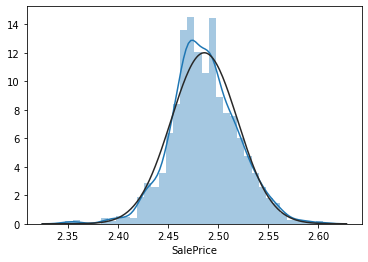

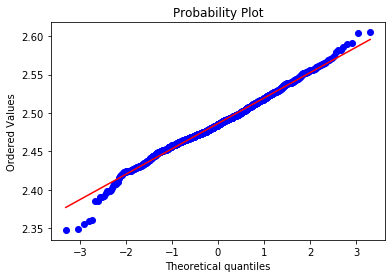

In [ ]:
#use log transformation
trainData['SalePrice'] = np.log(trainData['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(trainData['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(trainData['SalePrice'], plot=plt) 

In [ ]:

export_csv = trainData.to_csv(r'/gdrive/My Drive/CIS 508/Group Assignment/Preprocess_Train.csv')
exporttest_csv = testData.to_csv(r'/gdrive/My Drive/CIS 508/Group Assignment/Preprocess_Test.csv')

In [ ]:
trainfile = r'/gdrive/My Drive/CIS 508/Group Assignment/Preprocess_Train.csv'
trainData = pd.read_csv(trainfile)  #creates a dataframe
testfile = r'/gdrive/My Drive/CIS 508/Group Assignment/Preprocess_Test.csv'
testData = pd.read_csv(testfile)  #creates a dataframe
print(trainData.shape)
print(testData.shape)

(1460, 78)
(1459, 77)


In [ ]:
#Train data excluding target
x_train = trainData.iloc[:, :-1].copy()
x_test = testData.copy()

#Select just Target Column
y_train = trainData.iloc[:, -1].copy()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.head()) 

(1460, 77)
(1460,)
(1459, 77)
   Unnamed: 0  Unnamed: 0.1    Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition
0           0             0  1461          20       RH         80.0    11622   Pave      Reg         

In [ ]:
#List of Categorical Features -------ONE HOT ENCODING
categoricalFeatures = [x for x in x_test.columns if x_test.dtypes[x] == 'object']
print(categoricalFeatures)

#Combine Train and test for one Hot Encoding
combined_Data = pd.concat([x_train,x_test], keys=[0,1])

#Do one Hot encoding for categorical features
combined_Data = pd.get_dummies(combined_Data,columns=categoricalFeatures)

#Separate Train data and test data
x_train = combined_Data.xs(0)
x_test = combined_Data.xs(1)
x_test.head()

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


,Unnamed: 0,Unnamed: 0.1,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,Garage

In [ ]:
#CONSTRUCT DEFAULT Random Forest Regressor ==================
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_predict=rfr.predict(x_test)

pred1=pd.DataFrame(rfr_predict,columns=["SalePrice"])
pred1.head()

pd.concat([x_test['Id'],pred1],axis=1).to_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.RandomForestRegressor.csv', index = None)

res=pd.read_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.RandomForestRegressor.csv')
res.head()


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Id,SalePrice
0,1461,2.460776
1,1462,2.477574
2,1463,2.494107
3,1464,2.492289
4,1465,2.504254


In [ ]:
#Hyperparameter tuning for random forest
parameters={ 'n_estimators': range(5,150,5),'min_samples_split' : range(2,100,2),'max_depth': range(1,20,2)}
rfr_random = RandomizedSearchCV(rfr,parameters,n_iter=15)
rfr_random.fit(x_train, y_train)
grid_parm_rfr=rfr_random.best_params_
print(grid_parm_rfr)

#contruct random forest using the best parameters
rfr1= RandomForestRegressor(**grid_parm_rfr)
rfr1.fit(x_train,y_train)
rfr1_predict = rfr1.predict(x_test)

pred11=pd.DataFrame(rfr1_predict,columns=["SalePrice"])
pred11.head()

pd.concat([x_test['Id'],pred11],axis=1).to_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.HyperRFRegressor.csv', index = None)

res=pd.read_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.HyperRFRegressor.csv')
res.head()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_estimators': 110, 'min_samples_split': 10, 'max_depth': 13}


,Id,SalePrice
0,1461,2.463286
1,1462,2.478567
2,1463,2.493832
3,1464,2.492445
4,1465,2.502214


In [ ]:
#CONSTRUCT DEFAULT Decision Tree Regressor ==================
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr_predict=dtr.predict(x_test)

pred2=pd.DataFrame(dtr_predict,columns=["SalePrice"])
pred2.head()

pd.concat([x_test['Id'],pred2],axis=1).to_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.DecisionTreeRegressor.csv', index = None)

res=pd.read_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.DecisionTreeRegressor.csv')
res.head()

,Id,SalePrice
0,1461,2.465347
1,1462,2.480830
2,1463,2.489981
3,1464,2.490506
4,1465,2.514448


In [ ]:
#Hyperparameter tuning for decision tree
parameters={'min_samples_split' : range(2,50,2),'max_depth': range(1,20,2)}
dtr_random = RandomizedSearchCV(dtr,parameters,n_iter=15)
dtr_random.fit(x_train, y_train)
grid_parm=dtr_random.best_params_
print(grid_parm)

#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
dtr1 = DecisionTreeRegressor(**grid_parm)
dtr1.fit(x_train,y_train)
dtr1_predict = dtr1.predict(x_test)


pred21=pd.DataFrame(dtr1_predict,columns=["SalePrice"])
pred21.head()

pd.concat([x_test['Id'],pred21],axis=1).to_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.HyperDTRegressor.csv', index = None)

res=pd.read_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.HyperDTRegressor.csv')
res.head()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'min_samples_split': 44, 'max_depth': 15}


,Id,SalePrice
0,1461,2.466847
1,1462,2.479773
2,1463,2.495425
3,1464,2.493013
4,1465,2.503893


In [ ]:
#CONSTRUCT DEFAULT Multi Layer Perceptron Regressor ==================
mlp = MLPRegressor()
mlp.fit(x_train, y_train)
mlp_predict=mlp.predict(x_test)

pred3=pd.DataFrame(mlp_predict,columns=["SalePrice"])
pred3.head()

pd.concat([x_test['Id'],pred3],axis=1).to_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.MLPRegressor.csv', index = None)

res=pd.read_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.MLPRegressor.csv')
res.head()

,Id,SalePrice
0,1461,69.060591
1,1462,33.950153
2,1463,64.278133
3,1464,56.967082
4,1465,-20.242845


In [ ]:
#Hyperparameter tuning for MLP 
parameters={'hidden_layer_sizes' : range(50,200,10)}
mlp_random = RandomizedSearchCV(mlp,parameters,n_iter=15)
mlp_random.fit(x_train, y_train)
grid_parm=mlp_random.best_params_
print(grid_parm)

#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
mlp1 = MLPRegressor(**grid_parm)
mlp1.fit(x_train,y_train)
mlp1_predict = mlp1.predict(x_test)


pred31=pd.DataFrame(mlp1_predict,columns=["SalePrice"])
pred31.head()

pd.concat([x_test['Id'],pred31],axis=1).to_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.HyperMLPRegressor.csv', index = None)

res=pd.read_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.HyperMLPRegressor.csv')
res.head()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

{'hidden_layer_sizes': 180}


,Id,SalePrice
0,1461,39.942586
1,1462,66.456659
2,1463,37.391468
3,1464,25.843922
4,1465,49.729783


In [ ]:
#CONSTRUCT DEFAULT Support Vector Regressor ==================
svr = MLPRegressor()
svr.fit(x_train, y_train)
svr_predict=svr.predict(x_test)

pred4=pd.DataFrame(svr_predict,columns=["SalePrice"])
pred4.head()

pd.concat([x_test['Id'],pred4],axis=1).to_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.SVRegressor.csv', index = None)

res=pd.read_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.SVRegressor.csv')
res.head()

,Id,SalePrice
0,1461,100.191919
1,1462,208.441828
2,1463,117.932118
3,1464,81.998352
4,1465,90.093129


In [ ]:
# #Hyperparameter tuning for MLP 
# parameters={'hidden_layer_sizes' : range(50,200,10)}
# mlp_random = RandomizedSearchCV(mlp,parameters,n_iter=15)
# mlp_random.fit(x_train, y_train)
# grid_parm=mlp_random.best_params_
# print(grid_parm)

# #Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
# mlp1 = MLPRegressor(**grid_parm)
# mlp1.fit(x_train,y_train)
# mlp1_predict = mlp1.predict(x_test)


# pred31=pd.DataFrame(mlp1_predict,columns=["SalePrice"])
# pred31.head()

# pd.concat([x_test['Id'],pred31],axis=1).to_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.HyperMLPRegressor.csv', index = None)

# res=pd.read_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.HyperMLPRegressor.csv')
# res.head()

In [ ]:
# #CONSTRUCT DEFAULT Gradient Descent Regressor ==================
# from sklearn.ensemble import GradientBoostingClassifier
# sgd = SGDRegressor()
# sgd.fit(x_train, y_train)
# sgd_predict=sgd.predict(x_test)

# pred5=pd.DataFrame(sgd_predict,columns=["SalePrice"])
# pred5.head()

# pd.concat([x_test['Id'],pred5],axis=1).to_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.GradientDescentRegressor.csv', index = None)

# res=pd.read_csv('/gdrive/My Drive/CIS 508/Group Assignment/results.GradientDescentRegressor.csv')
# res.head()

NameError: ignored

In [ ]:
from vecstack import stacking

ModuleNotFoundError: ignored

In [ ]:
# #STACKING MODELS =====================================================================
# print("___________________________________________________________________________________________\nEnsemble Methods Predictions using GradientBoosting, RandomForest and Decision Tree Classifier\n")

# models = [ MLPRegressor(), RandomForestClassifier(), DecisionTreeClassifier() ]
      
# S_Train, S_Test = stacking(models,                   
#                            x_train, y_train, x_test,   
#                            regression=False, 
     
#                            mode='oof_pred_bag', 
       
#                            needs_proba=False,
         
#                            save_dir=None, 
            
#                            metric=accuracy_score, 
    
#                            n_folds=4, 
                 
#                            stratified=True,
            
#                            shuffle=True,  
            
#                            random_state=0,    
         
#                            verbose=2)


___________________________________________________________________________________________
Ensemble Methods Predictions using GradientBoosting, RandomForest and Decision Tree Classifier



NameError: ignored

In [ ]:
# #STACKING - CONTRUCT A GRADIENT BOOSTING MODEL==============================
# model = GradientBoostingClassifier()
    
# model = model.fit(S_Train, y_train)
# y_pred = model.predict(S_Test)
# print('Final prediction score for ensemble methods: [%.8f]' % accuracy_score(y_test, y_pred))
# print("Confusion Matrix after STACKING for Boosting:")
# print(confusion_matrix(y_test,y_pred))
# print("=== Classification Report ===")
# print(classification_report(y_test,y_pred))